In [1]:
# read profile data and convert to csv

from pathlib import Path
import os
from utils import prof_to_csv

profile_folder = "profiles"
profile_names = os.listdir(profile_folder)
raw_profiles_path = [os.path.join(profile_folder, name) for name in profile_names]
csv_profiles_path = [os.path.join("profiles_csv", f"{Path(name).stem}.csv") for name in profile_names]

for raw_path, csv_path in zip(raw_profiles_path, csv_profiles_path):
    profile = prof_to_csv(raw_path)
    with open(csv_path, "w") as f:
        f.write(profile)

In [2]:
len(profile_names)

40

In [3]:
# read sample profile

import pandas as pd
profile = pd.read_csv(os.path.join("profiles_csv", f"{Path(profile_names[0]).stem}.csv"))
profile.sort_values(by='tottime', ascending=False)\
    .head(10)

,ncalls,tottime,percall,cumtime,percall.1,filename:lineno(function)
88,350644,48.041,0.0,146.419,0.0,load_from_msp.py:58(parse_msp_file)
89,40044689,16.822,0.0,24.056,0.0,load_from_msp.py:109(get_peak_values)
92,40044689,11.377,0.0,34.316,0.0,load_from_msp.py:124(get_peak_comment)
36,60959981,10.936,0.0,15.414,0.0,re.py:289(_compile)
91,40044689,10.333,0.0,12.808,0.0,load_from_msp.py:117(get_peak_tuples)
83,13943528,8.809,0.0,24.544,0.0,PickyDict.py:152(_harmonize_key)
35,40044689,8.229,0.0,22.939,0.0,re.py:233(findall)
90,40044689,7.468,0.0,10.945,0.0,load_from_msp.py:120(<lambda>)
12,83575260,7.010,0.0,7.010,0.0,{method 'split' of 'str' objects}
18,62362690,4.621,0.0,4.738,0.0,{built-in method builtins.isinstance}


In [4]:
from utils import Profile

profiles = [Profile(path) for path in csv_profiles_path]
profiles

[NIST_EI_MS_.msp_CRITICAL_False,
 GNPS-LIBRARY_.msp_WARNING_False,
 GNPS-LIBRARY_.msp_WARNING_True,
 NIST_EI_MS_.mgf_CRITICAL_False,
 NIST_EI_MS_.mgf_WARNING_False,
 GNPS-LIBRARY_.mgf_INFO_False,
 GNPS-LIBRARY_.msp_DEBUG_True,
 GNPS-LIBRARY_.mgf_CRITICAL_True,
 GNPS-LIBRARY_.mgf_ERROR_True,
 NIST_EI_MS_.mgf_INFO_True,
 NIST_EI_MS_.mgf_INFO_False,
 NIST_EI_MS_.msp_DEBUG_True,
 GNPS-LIBRARY_.mgf_INFO_True,
 NIST_EI_MS_.mgf_ERROR_True,
 NIST_EI_MS_.msp_CRITICAL_True,
 GNPS-LIBRARY_.msp_ERROR_False,
 GNPS-LIBRARY_.mgf_ERROR_False,
 GNPS-LIBRARY_.mgf_CRITICAL_False,
 GNPS-LIBRARY_.msp_CRITICAL_False,
 NIST_EI_MS_.msp_WARNING_True,
 NIST_EI_MS_.msp_ERROR_False,
 NIST_EI_MS_.mgf_ERROR_False,
 GNPS-LIBRARY_.msp_ERROR_True,
 GNPS-LIBRARY_.msp_INFO_False,
 GNPS-LIBRARY_.mgf_DEBUG_True,
 NIST_EI_MS_.msp_ERROR_True,
 NIST_EI_MS_.mgf_WARNING_True,
 NIST_EI_MS_.msp_INFO_False,
 NIST_EI_MS_.mgf_DEBUG_True,
 GNPS-LIBRARY_.msp_DEBUG_False,
 GNPS-LIBRARY_.mgf_DEBUG_False,
 GNPS-LIBRARY_.mgf_WARNING_Fals

In [5]:
from collections import defaultdict

data = defaultdict(list, {key: [] for key in ("library", "format", "loglevel", "harmonization", "time")})
for p in profiles:
    data["library"].append(p.library)
    data["format"].append(p.fileformat)
    data["loglevel"].append(p.loglevel)
    data["harmonization"].append(p.harmonization)
    data["time"].append(p.time)

profiles_summary = pd.DataFrame(data)

In [6]:
profiles_summary

,library,format,loglevel,harmonization,time
0,NIST,msp,CRITICAL,False,181.194
1,GNPS,msp,WARNING,False,20.214
2,GNPS,msp,WARNING,True,23.243
3,NIST,mgf,CRITICAL,False,84.706
4,NIST,mgf,WARNING,False,83.113
5,GNPS,mgf,INFO,False,7.912
6,GNPS,msp,DEBUG,True,23.481
7,GNPS,mgf,CRITICAL,True,11.197
8,GNPS,mgf,ERROR,True,11.191
9,NIST,mgf,INFO,True,134.513


[Text(0.5, 1.0, 'NIST-library reading time'), Text(0, 0.5, 'Time (seconds)')]

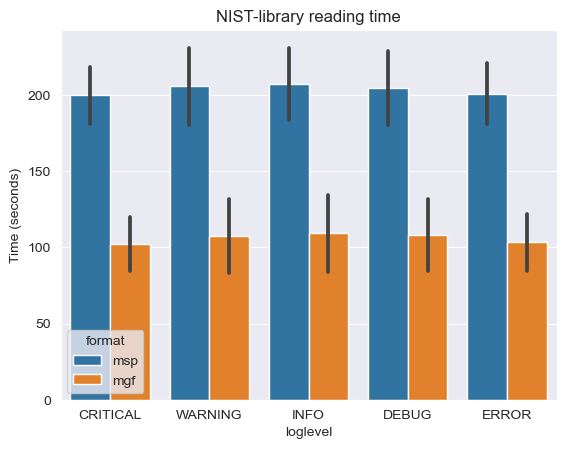

In [7]:
# compare execution time without taking harmonization into account
import seaborn as sns

sns.barplot(data=profiles_summary.loc[profiles_summary["library"] == "NIST"],
            x="loglevel",
            y="time",
            hue="format")\
    .set(title="NIST-library reading time", ylabel="Time (seconds)")

[Text(0.5, 1.0, 'GNPS-library reading time'), Text(0, 0.5, 'Time (seconds)')]

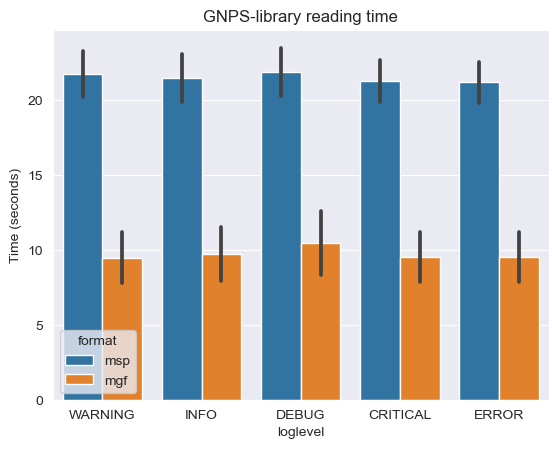

In [8]:
sns.barplot(data=profiles_summary.loc[profiles_summary["library"] == "GNPS"],
            x="loglevel",
            y="time",
            hue="format")\
    .set(title="GNPS-library reading time", ylabel="Time (seconds)")

In [9]:
profiles_grouped = profiles_summary.groupby(by=["library", "harmonization", "format"])\
    .mean()\
    .reset_index()\
    .astype({"library": str, "harmonization": bool, "format": str})
profiles_grouped

/var/folders/v8/_lm9wfvd1xxdt9lqt6754kym0000gn/T/ipykernel_13715/2406235927.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profiles_grouped = profiles_summary.groupby(by=["library", "harmonization", "format"])\


,library,harmonization,format,time
0,GNPS,False,mgf,7.9554
1,GNPS,False,msp,19.9828
2,GNPS,True,mgf,11.5270
3,GNPS,True,msp,22.9936
4,NIST,False,mgf,84.1366
5,NIST,False,msp,181.3144
6,NIST,True,mgf,127.8686
7,NIST,True,msp,226.1150


[Text(0.5, 1.0, 'Comparing data formats with and without harmonization (NIST data)'),
 Text(0, 0.5, 'Time (seconds)')]

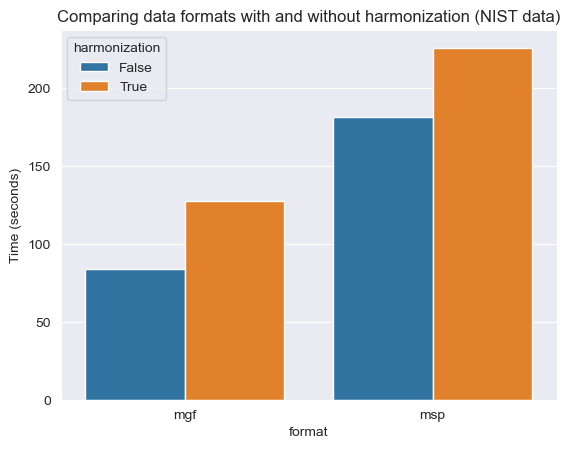

In [10]:
sns.barplot(data=profiles_grouped.loc[profiles_grouped["library"] == "NIST"],
            x="format",
            y="time",
            hue="harmonization")\
   .set(title="Comparing data formats with and without harmonization (NIST data)", ylabel="Time (seconds)")

[Text(0.5, 1.0, 'Comparing data formats with and without harmonization (GNPS data)'),
 Text(0, 0.5, 'Time (seconds)')]

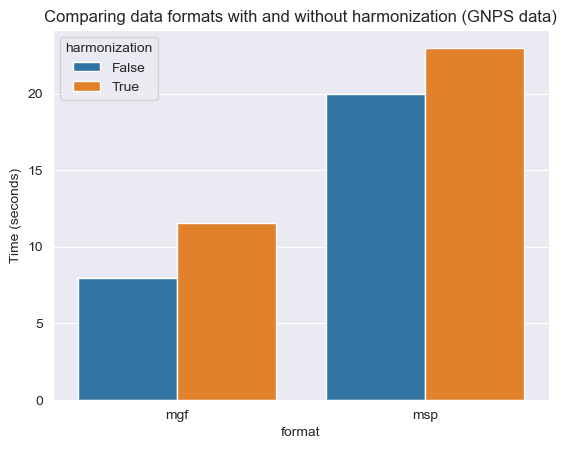

In [11]:
sns.barplot(data=profiles_grouped.loc[profiles_grouped["library"] == "GNPS"],
            x="format",
            y="time",
            hue="harmonization")\
   .set(title="Comparing data formats with and without harmonization (GNPS data)", ylabel="Time (seconds)")


In [12]:
msp_harmonized = sorted([p for p in profiles if p.harmonization and p.fileformat == "msp"], key=lambda x: x.profile_name)
msp_unharmonized = sorted([p for p in profiles if not p.harmonization and p.fileformat == "msp"], key=lambda x: x.profile_name)
mgf_harmonized = sorted([p for p in profiles if p.harmonization and p.fileformat == "mgf"], key=lambda x: x.profile_name)
mgf_unharmonized = sorted([p for p in profiles if not p.harmonization and p.fileformat == "mgf"], key=lambda x: x.profile_name)

In [13]:
msp_harmonized, msp_unharmonized

([GNPS-LIBRARY_.msp_CRITICAL_True,
  GNPS-LIBRARY_.msp_DEBUG_True,
  GNPS-LIBRARY_.msp_ERROR_True,
  GNPS-LIBRARY_.msp_INFO_True,
  GNPS-LIBRARY_.msp_WARNING_True,
  NIST_EI_MS_.msp_CRITICAL_True,
  NIST_EI_MS_.msp_DEBUG_True,
  NIST_EI_MS_.msp_ERROR_True,
  NIST_EI_MS_.msp_INFO_True,
  NIST_EI_MS_.msp_WARNING_True],
 [GNPS-LIBRARY_.msp_CRITICAL_False,
  GNPS-LIBRARY_.msp_DEBUG_False,
  GNPS-LIBRARY_.msp_ERROR_False,
  GNPS-LIBRARY_.msp_INFO_False,
  GNPS-LIBRARY_.msp_WARNING_False,
  NIST_EI_MS_.msp_CRITICAL_False,
  NIST_EI_MS_.msp_DEBUG_False,
  NIST_EI_MS_.msp_ERROR_False,
  NIST_EI_MS_.msp_INFO_False,
  NIST_EI_MS_.msp_WARNING_False])

In [27]:
msp_harmonized[1].profile

,ncalls,tottime,percall,cumtime,percall.1,filename:lineno(function)
0,15,0.000,0.0,0.000,0.0,{method 'find' of 'bytearray' objects}
1,1,0.000,0.0,0.000,0.0,{method 'clear' of 'list' objects}
2,133375,0.009,0.0,0.009,0.0,{method 'copy' of 'list' objects}
3,10351436,0.383,0.0,0.383,0.0,{method 'append' of 'list' objects}
4,1,0.000,0.0,0.000,0.0,{method 'remove' of 'list' objects}
...,...,...,...,...,...,...
206,182827,0.088,0.0,0.142,0.0,load_from_msp.py:133(parse_metadata)
207,5358515,0.349,0.0,0.349,0.0,load_from_msp.py:148(contains_metadata)
208,1,0.000,0.0,0.000,0.0,logging_functions.py:49(_init_logger)
209,1,0.000,0.0,0.000,0.0,logging_functions.py:60(set_matchms_logger_level)


In [31]:
msp_harmonized_prof = msp_harmonized[0].profile
msp_unharmonized_prof = msp_unharmonized[0].profile

In [32]:
# find difference set of called functions between harmonized and unharmonized
set_difference_msp = msp_harmonized_prof[~msp_harmonized_prof["filename:lineno(function)"].isin(msp_unharmonized_prof["filename:lineno(function)"])].sort_values(by="cumtime", ascending=False)
set_difference_msp

,ncalls,tottime,percall,cumtime,percall.1,filename:lineno(function)
42,12125,0.036,0.0,2.664,0.0,Spectrum.py:101(_apply_metadata_harmonization)
59,24250,0.012,0.0,1.572,0.0,Spectrum.py:204(metadata)
105,24250,0.006,0.0,0.772,0.0,Metadata.py:126(data)
99,12125,0.020,0.0,0.119,0.0,add_retention.py:63(_add_retention)
108,36375,0.015,0.0,0.087,0.0,PickyDict.py:116(__setitem__)
95,12125,0.018,0.0,0.070,0.0,add_precursor_mz.py:48(_add_precursor_mz_metad...
91,12125,0.003,0.0,0.036,0.0,utils.py:14(get_common_keys)
96,12125,0.003,0.0,0.034,0.0,add_retention.py:15(safe_store_value)
90,12125,0.024,0.0,0.032,0.0,utils.py:24(<listcomp>)
97,12125,0.013,0.0,0.019,0.0,add_retention.py:37(safe_convert_to_float)


[Text(0.5, 1.0, 'Most performance-heavy functions in metadata harmonization workflows for MSP data'),
 Text(0, 0.5, 'Function'),
 Text(0.5, 0, 'Cumulative time (seconds)')]

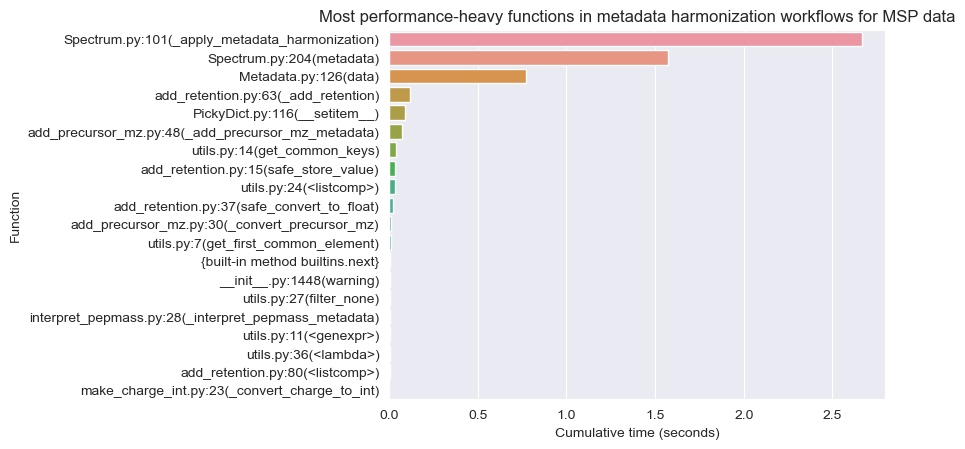

In [33]:
sns.barplot(data=set_difference_msp,
            x="cumtime",
            y="filename:lineno(function)")\
    .set(title="Most performance-heavy functions in metadata harmonization workflows for MSP data",
         ylabel="Function",
         xlabel="Cumulative time (seconds)")

In [34]:
# find difference set of called functions between harmonized and unharmonized mgf
mgf_harmonized_prof = mgf_harmonized[0].profile
mgf_unharmonized_prof = mgf_unharmonized[0].profile
set_difference_mgf = mgf_harmonized_prof[~mgf_harmonized_prof["filename:lineno(function)"].isin(
    mgf_unharmonized_prof["filename:lineno(function)"])].sort_values(by="cumtime", ascending=False)
set_difference_mgf


,ncalls,tottime,percall,cumtime,percall.1,filename:lineno(function)
52,12214,0.035,0.0,3.276,0.0,Spectrum.py:101(_apply_metadata_harmonization)
69,24428,0.012,0.0,1.953,0.0,Spectrum.py:204(metadata)
109,24428,0.006,0.0,0.964,0.0,Metadata.py:126(data)
112,48856,0.018,0.0,0.113,0.0,PickyDict.py:116(__setitem__)
101,12214,0.018,0.0,0.068,0.0,interpret_pepmass.py:28(_interpret_pepmass_met...
100,12214,0.017,0.0,0.064,0.0,add_precursor_mz.py:48(_add_precursor_mz_metad...
105,36642,0.011,0.0,0.016,0.0,make_charge_int.py:23(_convert_charge_to_int)
98,12214,0.005,0.0,0.010,0.0,utils.py:7(get_first_common_element)
102,12214,0.006,0.0,0.007,0.0,interpret_pepmass.py:62(_get_mz_intensity_charge)
103,24428,0.004,0.0,0.006,0.0,interpret_pepmass.py:75(_convert_mz_or_intensity)


[Text(0.5, 1.0, 'Most performance-heavy functions in metadata harmonization workflows for MGF data'),
 Text(0, 0.5, 'Function'),
 Text(0.5, 0, 'Cumulative time (seconds)')]

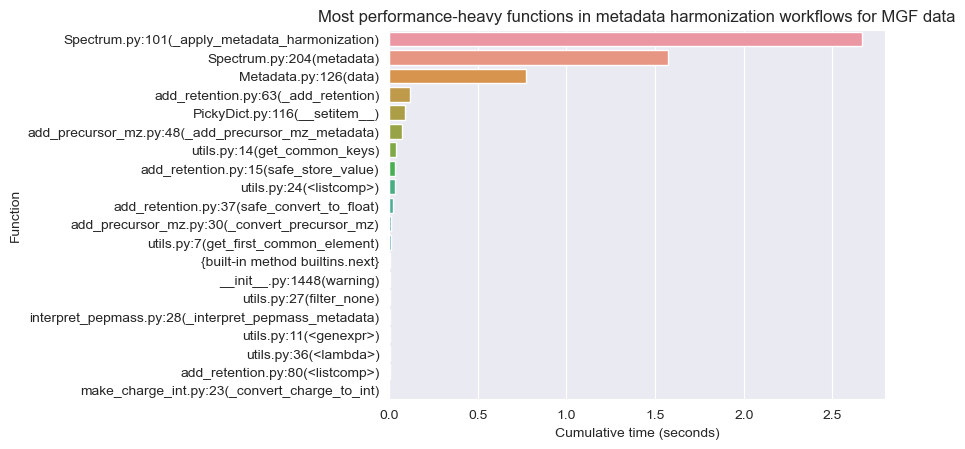

In [35]:
sns.barplot(data=set_difference_msp,
            x="cumtime",
            y="filename:lineno(function)")\
    .set(title="Most performance-heavy functions in metadata harmonization workflows for MGF data",
         ylabel="Function",
         xlabel="Cumulative time (seconds)")


In [46]:
set_intersection_msp = msp_harmonized_prof.join(msp_unharmonized_prof.set_index("filename:lineno(function)"),
                                               on="filename:lineno(function)",
                                               lsuffix="_harmonized",
                                               rsuffix="_unharmonized")
set_intersection_msp

,ncalls_harmonized,tottime_harmonized,percall_harmonized,cumtime_harmonized,percall.1_harmonized,filename:lineno(function),ncalls_unharmonized,tottime_unharmonized,percall_unharmonized,cumtime_unharmonized,percall.1_unharmonized
0,1,0.000,0.0,0.000,0.0,{method 'clear' of 'list' objects},1.0,0.000,0.0,0.000,0.0
1,133375,0.009,0.0,0.009,0.0,{method 'copy' of 'list' objects},48500.0,0.003,0.0,0.003,0.0
2,10351378,0.381,0.0,0.381,0.0,{method 'append' of 'list' objects},10351378.0,0.378,0.0,0.378,0.0
3,1,0.000,0.0,0.000,0.0,{method 'remove' of 'list' objects},1.0,0.000,0.0,0.000,0.0
4,230377,0.015,0.0,0.015,0.0,{method 'get' of 'dict' objects},145502.0,0.009,0.0,0.009,0.0
...,...,...,...,...,...,...,...,...,...,...,...
119,182827,0.085,0.0,0.139,0.0,load_from_msp.py:133(parse_metadata),182827.0,0.085,0.0,0.137,0.0
120,5358515,0.348,0.0,0.348,0.0,load_from_msp.py:148(contains_metadata),5358515.0,0.347,0.0,0.347,0.0
121,1,0.000,0.0,0.000,0.0,logging_functions.py:49(_init_logger),1.0,0.000,0.0,0.000,0.0
122,1,0.000,0.0,0.000,0.0,logging_functions.py:60(set_matchms_logger_level),1.0,0.000,0.0,0.000,0.0


In [47]:
set_intersection_msp["time_difference"] = set_intersection_msp["tottime_harmonized"] - set_intersection_msp["tottime_unharmonized"]
set_intersection_msp["ncalls_difference"] = set_intersection_msp["ncalls_harmonized"] - set_intersection_msp["ncalls_unharmonized"]

In [48]:
set_intersection_msp = set_intersection_msp[["time_difference", "ncalls_difference", "filename:lineno(function)"]].sort_values(by="time_difference", ascending=False)
set_intersection_msp

,time_difference,ncalls_difference,filename:lineno(function)
109,0.713,1309500.0,PickyDict.py:152(_harmonize_key)
38,0.386,2255250.0,re.py:289(_compile)
22,0.386,2255250.0,{method 'sub' of 're.Pattern' objects}
36,0.384,2255250.0,re.py:203(sub)
110,0.194,84875.0,PickyDict.py:163(_apply_replacements)
...,...,...,...
99,NaN,NaN,add_retention.py:63(_add_retention)
100,NaN,NaN,interpret_pepmass.py:28(_interpret_pepmass_met...
101,NaN,NaN,make_charge_int.py:23(_convert_charge_to_int)
105,NaN,NaN,Metadata.py:126(data)
